In [1]:
import pandas as pd

In [2]:
for pathogen in ["measles", "acute_polio", "paralytic_polio"]:
    df = pd.read_csv(f"data/{pathogen}_Hunter.csv")
    if 'Unnamed: 0' in df.columns:
        # If the column exists, drop it
        print(f"Dropping 'Unnamed: 0' column from {pathogen}_Hunter.csv")
        df.drop(columns=["Unnamed: 0"], inplace=True)
    df.to_csv(f"data/{pathogen}_Hunter.csv", index=False)

del df

In [3]:
df = pd.read_csv("data/measles_Hunter.csv")
df.head()

ConditionName Admin1Name PeriodStartDate PeriodEndDate  CountValue
0       Measles   NEW YORK      11/20/1927    11/26/1927         133
1       Measles   NEW YORK      11/27/1927     12/3/1927         299
2       Measles   NEW YORK       12/4/1927    12/10/1927         289
3       Measles   NEW YORK      12/18/1927    12/24/1927         318
4       Measles   NEW YORK      12/25/1927    12/31/1927         636

In [4]:
df.PeriodStartDate = pd.to_datetime(df.PeriodStartDate, format="mixed")
df.PeriodEndDate = pd.to_datetime(df.PeriodEndDate, format="mixed")
df.sort_values(by=["PeriodStartDate"])

ConditionName Admin1Name PeriodStartDate PeriodEndDate  CountValue
4463        Measles   NEW YORK      1888-07-15    1888-07-21           1
4464        Measles   NEW YORK      1888-07-29    1888-08-04           2
4465        Measles   NEW YORK      1888-08-26    1888-09-01           1
9647        Measles   NEW YORK      1888-09-02    1888-09-08           1
4466        Measles   NEW YORK      1888-09-16    1888-09-22           1
...             ...        ...             ...           ...         ...
19429       Measles    VERMONT      2000-12-31    2001-04-28           1
19439       Measles    VERMONT      2000-12-31    2001-06-02           1
19496       Measles    VERMONT      2000-12-31    2001-12-29           1
3848        Measles    VERMONT      2001-01-26    2001-02-01           1
3849        Measles    VERMONT      2001-09-23    2001-09-29           1

[19497 rows x 5 columns]

In [5]:
df["period_length_time_delta"] = (df.PeriodEndDate - df.PeriodStartDate)
df["period_length_in_days"] = df.period_length_time_delta.dt.days
df[df.period_length_time_delta > pd.Timedelta(days=6)].Admin1Name.unique()

array(['VERMONT'], dtype=object)

In [6]:
df[df.period_length_time_delta > pd.Timedelta(days=6)].head(10)

ConditionName Admin1Name PeriodStartDate PeriodEndDate  CountValue  \
17899       Measles    VERMONT      1965-01-03    1965-01-16          20   
17900       Measles    VERMONT      1965-01-03    1965-01-23          20   
17901       Measles    VERMONT      1965-01-03    1965-01-30          28   
17902       Measles    VERMONT      1965-01-03    1965-02-06         101   
17903       Measles    VERMONT      1965-01-03    1965-02-13         105   
17904       Measles    VERMONT      1965-01-03    1965-02-20         113   
17905       Measles    VERMONT      1965-01-03    1965-02-27         119   
17906       Measles    VERMONT      1965-01-03    1965-03-06         150   
17907       Measles    VERMONT      1965-01-03    1965-03-13         181   
17908       Measles    VERMONT      1965-01-03    1965-03-20         246   

      period_length_time_delta  period_length_in_days  
17899                  13 days                     13  
17900                  20 days                     20  
17901                  27 days                     27  
17902                  34 days                     34  
17903                  41 days                     41  
17904                  48 days                     48  
17905                  55 days                     55  
17906                  62 days                     62  
17907                  69 days                     69  
17908                  76 days                     76

In [7]:
df[df.period_length_in_days > 6].head(10)

ConditionName Admin1Name PeriodStartDate PeriodEndDate  CountValue  \
17899       Measles    VERMONT      1965-01-03    1965-01-16          20   
17900       Measles    VERMONT      1965-01-03    1965-01-23          20   
17901       Measles    VERMONT      1965-01-03    1965-01-30          28   
17902       Measles    VERMONT      1965-01-03    1965-02-06         101   
17903       Measles    VERMONT      1965-01-03    1965-02-13         105   
17904       Measles    VERMONT      1965-01-03    1965-02-20         113   
17905       Measles    VERMONT      1965-01-03    1965-02-27         119   
17906       Measles    VERMONT      1965-01-03    1965-03-06         150   
17907       Measles    VERMONT      1965-01-03    1965-03-13         181   
17908       Measles    VERMONT      1965-01-03    1965-03-20         246   

      period_length_time_delta  period_length_in_days  
17899                  13 days                     13  
17900                  20 days                     20  
17901                  27 days                     27  
17902                  34 days                     34  
17903                  41 days                     41  
17904                  48 days                     48  
17905                  55 days                     55  
17906                  62 days                     62  
17907                  69 days                     69  
17908                  76 days                     76

In [8]:
import altair as alt

alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [9]:
alt.Chart(df).mark_line().encode(
    x="PeriodStartDate:T",
    y="CountValue:Q",
    color="Admin1Name:N",
).properties(
    width=800,
    height=400,
    title="Measles Cases by PerdiodStartDate and Admin1Name",
)

alt.Chart(...)

In [10]:
alt.Chart(df).mark_circle().encode(
    x="PeriodStartDate:T",
    y="period_length_in_days:Q",
    color="Admin1Name:N",
    column="Admin1Name:N",
).properties(
    width=300,
    height=100,
    title="Measles Cases by PerdiodStartDate and Admin1Name",
)

alt.Chart(...)

In [11]:
df.isna().sum(axis=0)

ConditionName               0
Admin1Name                  0
PeriodStartDate             0
PeriodEndDate               0
CountValue                  0
period_length_time_delta    0
period_length_in_days       0
dtype: int64

In [12]:
df[df.PeriodStartDate > pd.to_datetime("19100101", format="%Y%m%d")]

ConditionName Admin1Name PeriodStartDate PeriodEndDate  CountValue  \
0           Measles   NEW YORK      1927-11-20    1927-11-26         133   
1           Measles   NEW YORK      1927-11-27    1927-12-03         299   
2           Measles   NEW YORK      1927-12-04    1927-12-10         289   
3           Measles   NEW YORK      1927-12-18    1927-12-24         318   
4           Measles   NEW YORK      1927-12-25    1927-12-31         636   
...             ...        ...             ...           ...         ...   
19492       Measles    VERMONT      2000-12-31    2001-12-15           1   
19493       Measles    VERMONT      2000-12-31    2001-12-22           1   
19494       Measles    VERMONT      2000-12-31    2001-12-22           1   
19495       Measles    VERMONT      2000-12-31    2001-12-29           1   
19496       Measles    VERMONT      2000-12-31    2001-12-29           1   

      period_length_time_delta  period_length_in_days  
0                       6 days                      6  
1                       6 days                      6  
2                       6 days                      6  
3                       6 days                      6  
4                       6 days                      6  
...                        ...                    ...  
19492                 349 days                    349  
19493                 356 days                    356  
19494                 356 days                    356  
19495                 363 days                    363  
19496                 363 days                    363  

[18478 rows x 7 columns]

In [13]:
df.PeriodStartDate[0]

Timestamp('1927-11-20 00:00:00')

In [14]:
alt.Chart(
    df[
        (df.PeriodStartDate > pd.to_datetime("19100101", format="%Y%m%d"))
        & (df.PeriodStartDate < pd.to_datetime("19600101", format="%Y%m%d"))
    ]
).mark_line().encode(
    x=alt.X("yearmonth(PeriodStartDate):T"),
    y=alt.Y("sum(CountValue):Q", scale=alt.Scale(padding=1)),
    color="Admin1Name:N",
    row="Admin1Name:N",
).properties(
    width=800,
    height=200,
    title="Measles Cases by PerdiodStartDate and Admin1Name",
).resolve_scale(
    y='independent'  # <-- This makes each row have its own y-scale
)

alt.Chart(...)

In [15]:
df_subset = df[
    (df.PeriodStartDate > pd.to_datetime("19300101", format="%Y%m%d"))
    & (df.PeriodStartDate < pd.to_datetime("19400101", format="%Y%m%d"))
]
df_subset_grouped = df_subset.groupby(
    by=["Admin1Name", pd.Grouper(key="PeriodStartDate", freq="MS")],
    as_index=False,
).agg({"CountValue": "sum"})

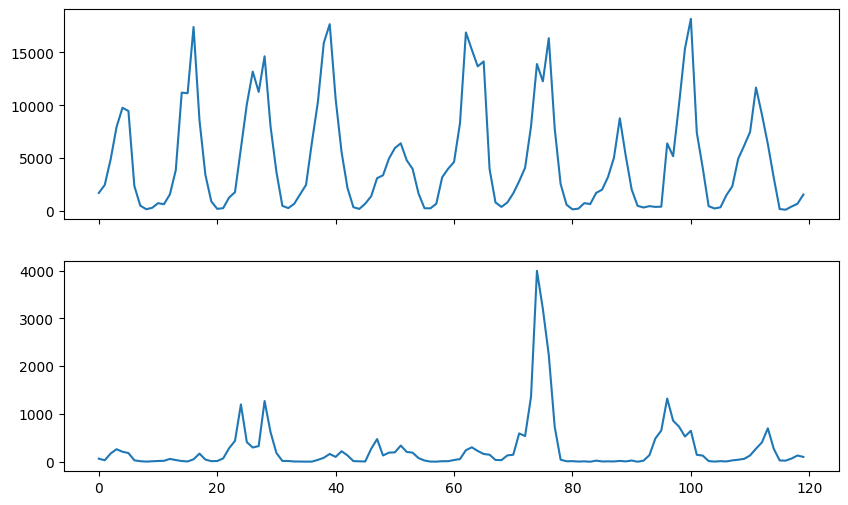

In [16]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

observed_cases_ny = df_subset_grouped[df_subset_grouped.Admin1Name == "NEW YORK"].CountValue.values
observed_cases_vt = df_subset_grouped[df_subset_grouped.Admin1Name == "VERMONT"].CountValue.values

ax[0].plot(observed_cases_ny)
ax[1].plot(observed_cases_vt)

In [17]:
ny_obs_cases_df = df_subset_grouped[df_subset_grouped.Admin1Name == "NEW YORK"].drop(
    columns=["Admin1Name"]
).rename({"PeriodStartDate": "month_start", "CountValue": "new_york_obs_cases"}, axis=1)
vt_obs_cases_df = df_subset_grouped[df_subset_grouped.Admin1Name == "VERMONT"].drop(
    columns=["Admin1Name"]
).rename({"PeriodStartDate": "month_start", "CountValue": "vermont_obs_cases"}, axis=1)

In [18]:
obs_cases_subset_to_fit = pd.merge(
    ny_obs_cases_df,
    vt_obs_cases_df,
    on="month_start",
    how="left"
)
obs_cases_subset_to_fit.to_csv("data/measles_in_new_york_and_vermont_1930_1939.csv", index=False)

<Axes: title={'center': 'Observed Measles Cases in New York and Vermont (1930-1939)'}, xlabel='month_start'>

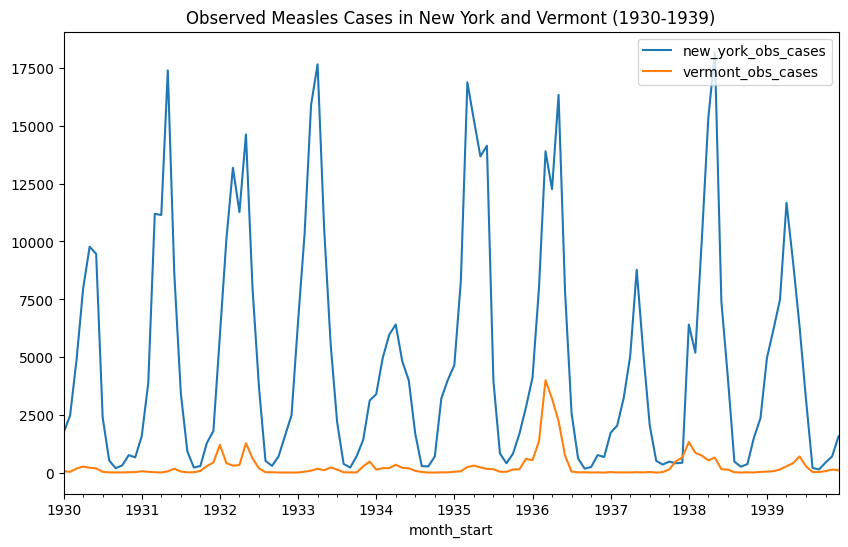

In [19]:
obs_cases_subset_to_fit.plot(
    x="month_start",
    y=["new_york_obs_cases", "vermont_obs_cases"],
    kind="line",
    figsize=(10, 6),
    title="Observed Measles Cases in New York and Vermont (1930-1939)",
)

In [20]:
import numpy as np

np.vstack([observed_cases_ny, observed_cases_vt]).shape

(2, 120)

In [31]:
alt.Chart(df_subset).mark_line().encode(
    x=alt.X("yearmonth(PeriodStartDate):T", title="Month Start Date"),
    y=alt.Y("sum(CountValue):Q", scale=alt.Scale(padding=1), title="Observed New Cases"),
    color=alt.Color("Admin1Name:N", title="State"),
    row=alt.Row("Admin1Name:N", title="State"),
).properties(
    width=800,
    height=200,
    title=alt.Title("Measles Cases by Month Start Date and State", fontSize=25, align="center", anchor="middle"),
).resolve_scale(
    y='independent'  # <-- This makes each row have its own y-scale
).save("visuals/measles_cases_by_state_and_month_start.png", scale_factor=4)